# Getting Briefings and Collections

A quick demo to show that Briefings and Collections follow a similar workflow to the StoryMap class. These classes contain content that can be viewed, edited, and saved to update your work.

In [2]:
from arcgis.gis import GIS
from arcgis.apps.storymap import Briefing, Collection, Map
import warnings
warnings.filterwarnings("ignore")

gis = GIS(profile="geosaurus")

The ArcGIS StoryMaps team has put together a Collection of their favorite Briefings

https://storymaps.arcgis.com/collections/43a987f6351d4ecbaf20a13e663c08c6

We can utilize the classes in the Python API to access this and pick out a Briefing.

## Grab the Collection with the item's id

Create an instance of the Collection class using the existing item.

In [3]:
collection = Collection("43a987f6351d4ecbaf20a13e663c08c6")

## Explore the Collection

In [4]:
collection.content

[Cover,
 Collection Navigation,
 Embed: https://storymaps.arcgis.com/briefings/f99a9cea4902441eba8c9683d24d8132,
 <Item title:"Residential redevelopment in the West Don Lands" type:StoryMap owner:wdavison_Story>,
 <Item title:"The Power of Proximity " type:StoryMap owner:andria.storymaps>,
 <Item title:"Preparing for sea level rise" type:StoryMap owner:andria.storymaps>,
 Embed: https://storymaps.arcgis.com/briefings/8d47c05eaea24c34a217ad7e340fb9e5,
 <Item title:"U.S. Wildfire Snapshot " type:StoryMap owner:michelle.storymaps>,
 Embed: https://storymaps.arcgis.com/briefings/3a77266dfb2b4f468e158b15ab70a309,
 <Item title:"Redlining and its impact" type:StoryMap owner:ashleynicoledu>,
 <Item title:"Conserving our planet, one story at a time" type:StoryMap owner:michelle.storymaps>,
 <Item title:"Food and culture" type:StoryMap owner:andria.storymaps>,
 Embed: https://storymaps.arcgis.com/briefings/1e1e70c3204d42229609cefe21f9b18c,
 <Item title:"Homegrown South Bronx proposal: grow local

## Grab a Briefing

<Item title:"Preparing for sea level rise" type:StoryMap owner:andria.storymaps>
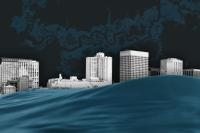

In [5]:
briefing_item = collection.content[5]
briefing_item

In [6]:
# Pass the item to the briefing class and see published briefing
br = Briefing(briefing_item)
br.show()

### Explore through the classes available

A Briefing is composed of slides, we can go through each slide to see the content, similar to StoryMaps

In [7]:
# Display as classes
br.slides

[Briefing Slide: cover,
 Briefing Slide: double,
 Briefing Slide: double,
 Briefing Slide: double,
 Briefing Slide: section-double,
 Briefing Slide: double,
 Briefing Slide: double,
 Briefing Slide: full,
 Briefing Slide: double,
 Briefing Slide: double,
 Briefing Slide: single]

Above we see all the slides of the Briefing and the type of display of the slide.  
We can grab one slide to further see the contents.

In [8]:
# See the 6th slide
br.slides[5]

Briefing Slide: double

In [9]:
# Slides are divided by blocks, because it is a double we have two blocks.
br.slides[5].blocks

[Left Block, Right Block]

In [10]:
# Blocks are what hold the slide content
br.slides[5].blocks[0].content

[Text: paragraph,
 Text: paragraph,
 Text: paragraph,
 Text,
 Text,
 Text,
 Text,
 Text,
 Text,
 Text]

In [11]:
br.slides[5].blocks[1].content

[Web Map]

<Item title:"Sea level rise maps for briefing" type:Web Map owner:andria.storymaps>
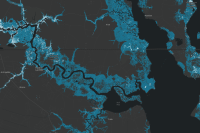

In [12]:
# Since the content of each slide is are classes as well, we can further explore through their properties
br.slides[5].blocks[1].content[0].map

### Let's say I really like the map on slide 6 and I want to add this to a briefing of mine.

In [10]:
# Create a new briefing that will be saved in my account
my_br = Briefing()
my_br

https://storymaps.arcgis.com/briefings/be0683ea7fb84608b48afd0628df2f48

In [11]:
# A new briefing only contains a cover slide
my_br.slides

[Briefing Slide: cover]

In [12]:
# Add a new slide
my_br.add("single")

Briefing Slide: single

In [13]:
# The new slide got added
my_br.slides

[Briefing Slide: cover, Briefing Slide: single]

In [14]:
# Get the map from the briefing
map_item = br.slides[5].blocks[1].content[0].map

In [15]:
# Access our new slide and the block in the new slide
new_slide = my_br.slides[1]
# Add the map to the block
block = new_slide.blocks[0]
block.content #empty

[]

In [16]:
# Add the map to the block
block.add_content(Map(map_item))

Web Map

In [17]:
block.content

[Web Map]

In [18]:
# Add a title to our new slide
new_slide.title = "Wow Look At This Map!"

In [19]:
my_br.save("Test Briefing")

<Item title:"Test Briefing" type:StoryMap owner:naubry_geosaurus>